In [63]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
from metpy.calc import dewpoint_from_relative_humidity, wet_bulb_temperature
from metpy.units import units
from PIL import Image
import numpy as np
import datetime
import xarray as xr
import glob
import pyart


from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [94]:
my_glob = glob.glob('/Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023*')
xr_wxt = xr.open_mfdataset(my_glob)

In [95]:
xr_wxt

<xarray.Dataset>
Dimensions:        (time: 102196)
Coordinates:
  * time           (time) datetime64[ns] 2023-06-01 ... 2023-06-12T19:52:30
Data variables:
    temperatures   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    humidity       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    pressure       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    rainfall       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    dewpoint       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wetbulb        (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_dir_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_mean_10s  (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_max_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>

[Text(19509.0, 0, ''),
 Text(19511.0, 0, ''),
 Text(19513.0, 0, ''),
 Text(19515.0, 0, ''),
 Text(19517.0, 0, ''),
 Text(19519.0, 0, ''),
 Text(19521.0, 0, '')]

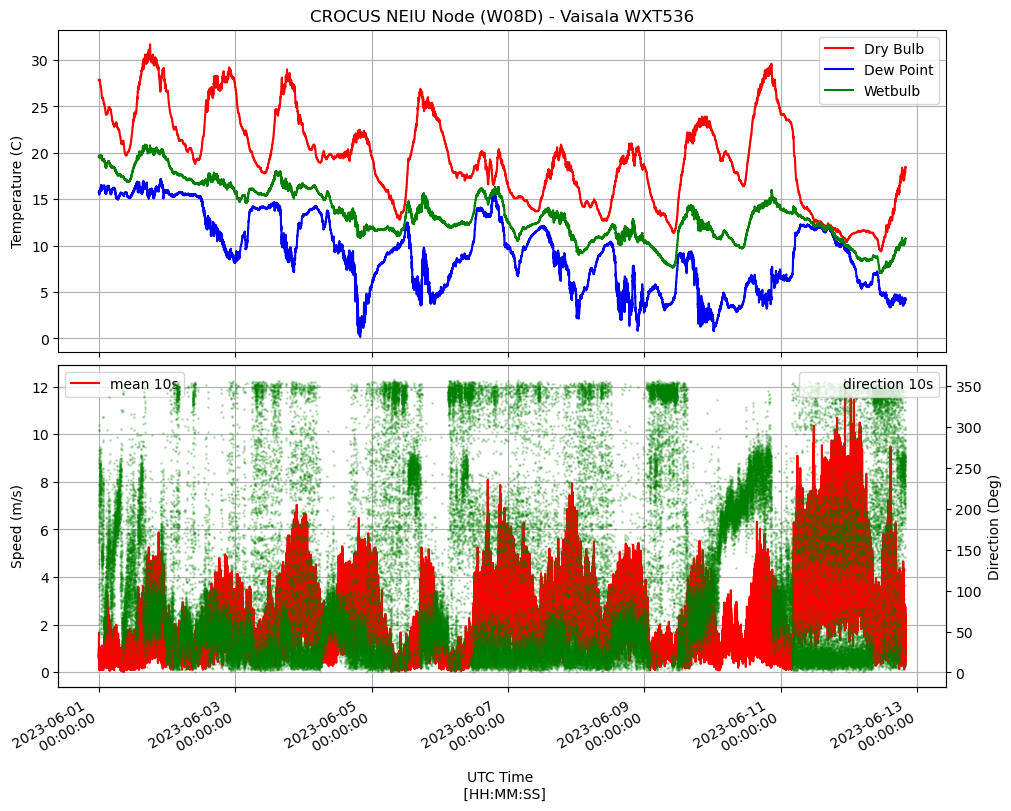

In [99]:
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_wxt.temperatures.plot(ax=axs[0], color='r', label='Dry Bulb')
xr_wxt.dewpoint.plot(color='b', label='Dew Point',ax=axs[0])
xr_wxt.wetbulb.plot(color='g', label='Wetbulb',ax=axs[0])

xr_wxt.wind_mean_10s.plot(ax=axs[1], color='r', label='mean 10s')
ytwin = plt.twinx()

xr_wxt.wind_dir_10s.plot(ax=ytwin, color='g', label='direction 10s', marker='.', linestyle='none', 
                         markersize=2, alpha = 0.2)

axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala WXT536')
axs[0].set_xlabel('')
axs[0].set_ylabel('Temperature (C)')


axs[1].set_xlabel('UTC Time \n [HH:MM:SS]')
axs[1].set_ylabel('Speed (m/s)')
axs[0].grid()
axs[1].grid()


axs[0].legend()
axs[0].grid(True)

axs[1].legend()
axs[1].grid(True)

ytwin.set_ylabel('Direction (Deg)')
ytwin.legend(loc=1)

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

axs[1].xaxis.set_major_formatter(date_form)
axs[0].set_xticklabels([])




In [ ]:
xr.

In [104]:
my_glob = glob.glob('/Users/scollis/data/aqt/CMS_aqt580_NEIU_a1_202306*')
xr_aqt = xr.open_mfdataset(my_glob)

In [105]:
xr_aqt

<xarray.Dataset>
Dimensions:           (time: 18164)
Coordinates:
  * time              (time) datetime64[ns] 2023-06-01T00:00:03.354465665 ......
Data variables: (12/21)
    name              (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    meta.description  (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    meta.host         (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    meta.missing      (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    meta.node         (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    meta.plugin       (time) object dask.array<chunksize=(1439,), meta=np.ndarray>
    ...                ...
    o3                (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>
    no2               (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>
    co                (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>
    temp              (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>
    hum               (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>
    dewpoint          (time) float64 dask.array<chunksize=(1439,), meta=np.ndarray>

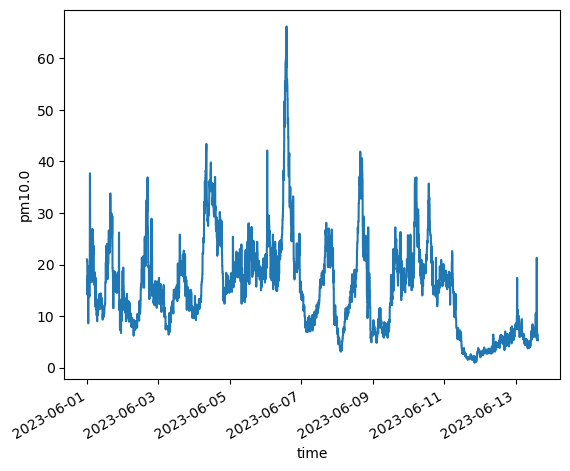

In [106]:
xr_aqt['pm10.0'].plot()

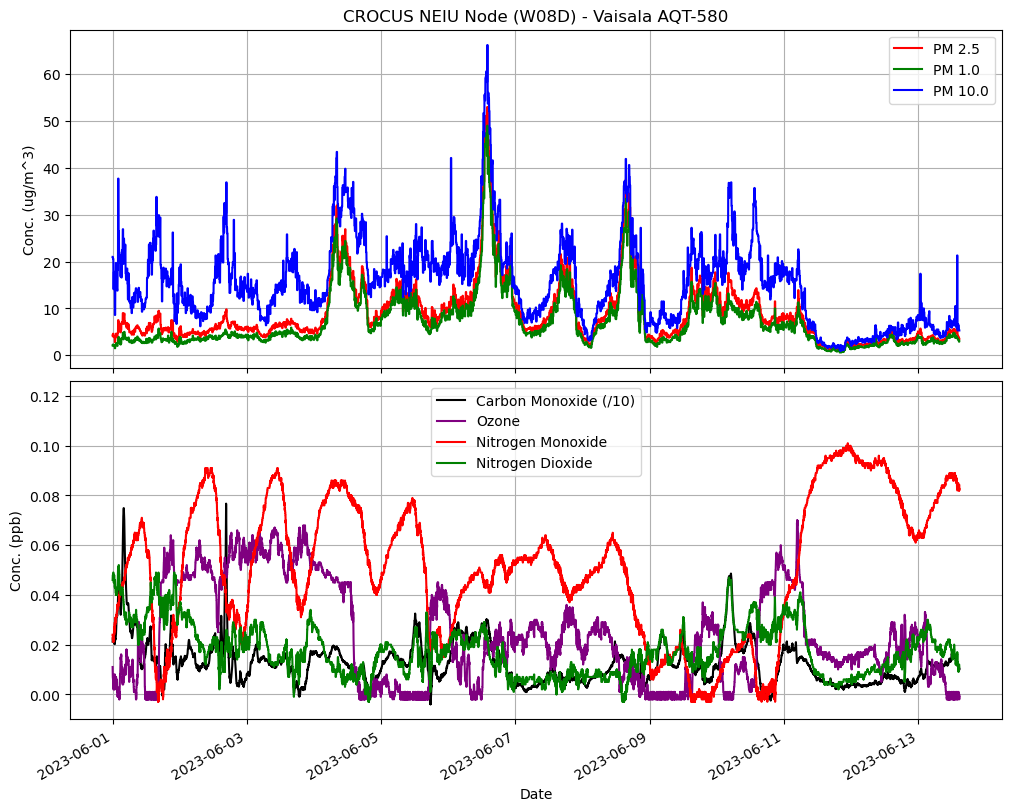

In [107]:
time1 = None # pd.Timestamp("2023-05-17 00:00:00")
time2 = None #pd.Timestamp("2023-06-09 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')

axs[0].legend()

axs[1].set_title('')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Conc. (ppb)')

axs[1].legend()

axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[0].grid()
axs[1].grid()

In [54]:
a = axs[0]

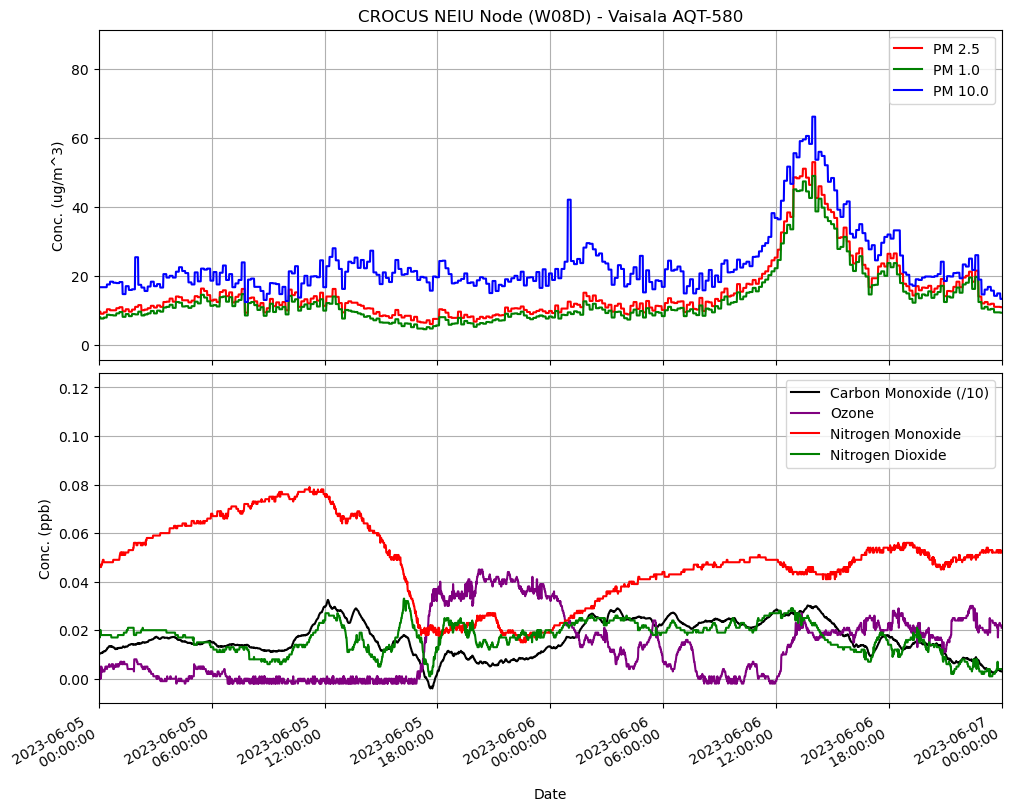

In [59]:


time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')

axs[0].legend()

axs[1].set_title('')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Conc. (ppb)')

axs[1].legend()

axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[0].grid()
axs[1].grid()

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[1].xaxis.set_major_formatter(date_form)


In [60]:
cl61_data = xr.open_dataset('/Users/scollis/data/QC-wildfire-plume.nc')

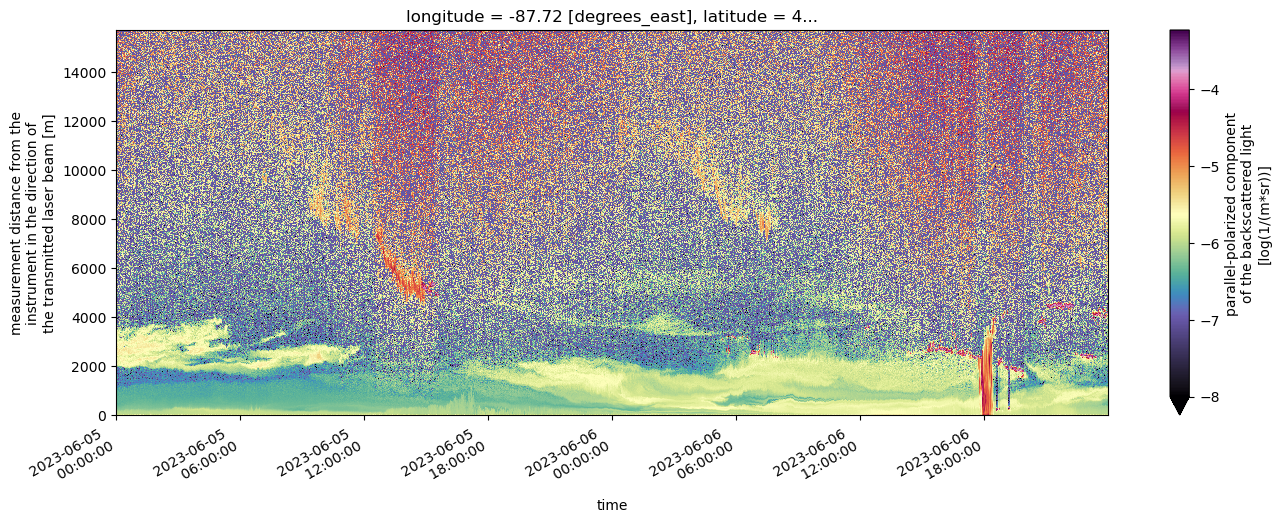

In [64]:
figme = plt.figure(figsize=[16,5])
cl61_data.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)


In [73]:
my_glob = glob.glob('/Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023060*')
xr_wxt = xr.open_mfdataset(my_glob)

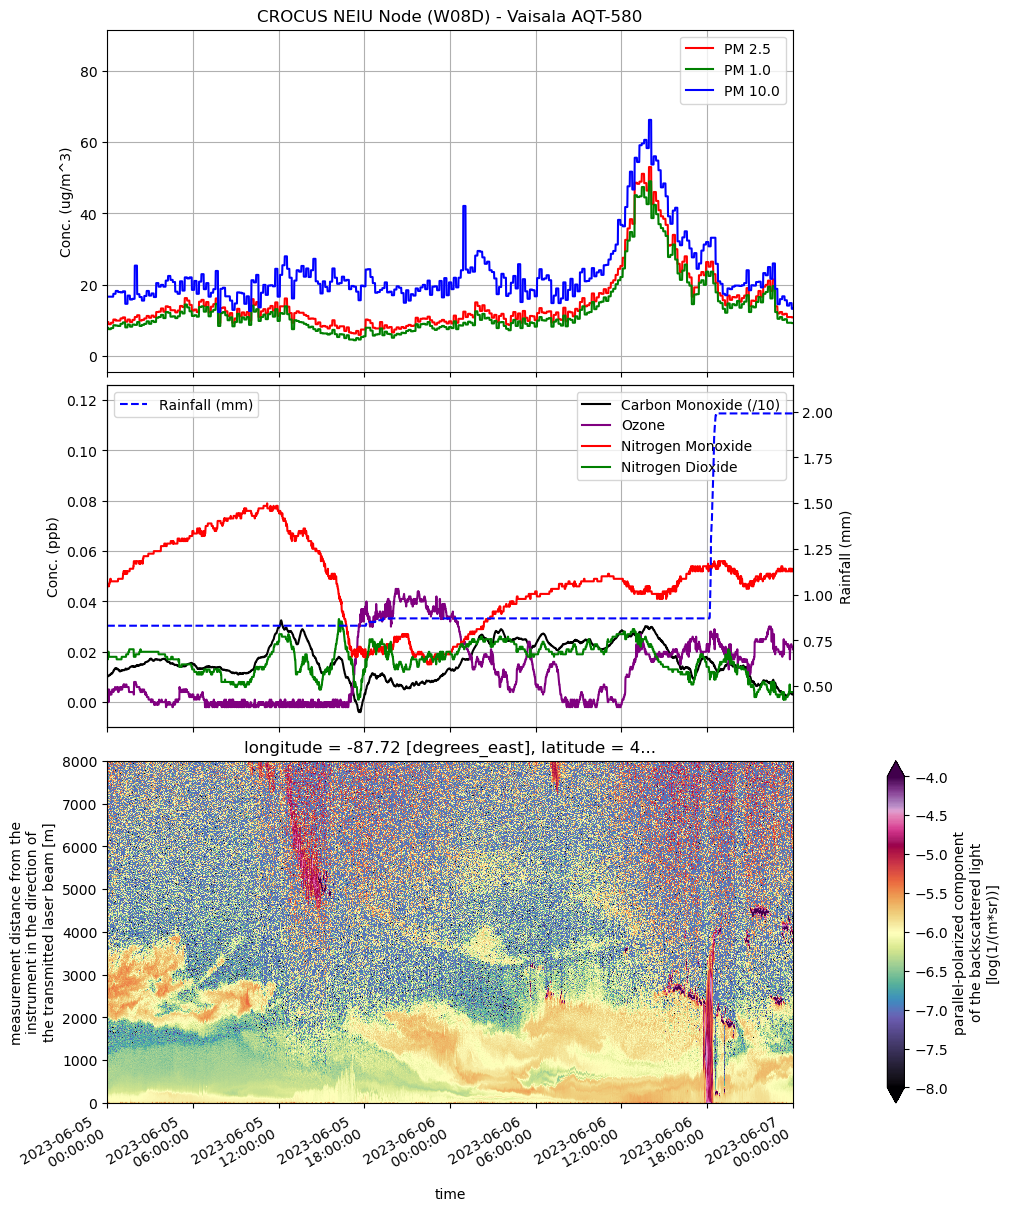

In [81]:


time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=3, figsize=[10,12], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')


axs[1].set_title('')
axs[1].set_xlabel('')
axs[1].set_ylabel('Conc. (ppb)')



axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
axs[0].grid()
axs[1].grid()

my_twin = plt.twinx(ax = axs[1])
xr_wxt.rainfall.plot(ax=my_twin, label = 'Rainfall (mm)', color='b', linestyle='dashed')

my_twin.set_ylabel('Rainfall (mm)')

axs[1].legend()
axs[0].legend()
my_twin.legend()

cl61_data.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, 
                                       vmin = -8, vmax = -4, ax=axs[2])
axs[2].set_ylim([0,8000])
axs[2].set_xlim(time1, time2)

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[2].xaxis.set_major_formatter(date_form)




In [75]:
plt.twinx?